# Importing the necessary libraries   

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
import datetime
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [34]:
df = pd.read_csv('car_data.csv')

In [35]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Exploratory Data Analysis

In [36]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [38]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [39]:
df.shape

(301, 9)

In [40]:
out_liers = df[['Selling_Price' , 'Present_Price' , 'Kms_Driven']]

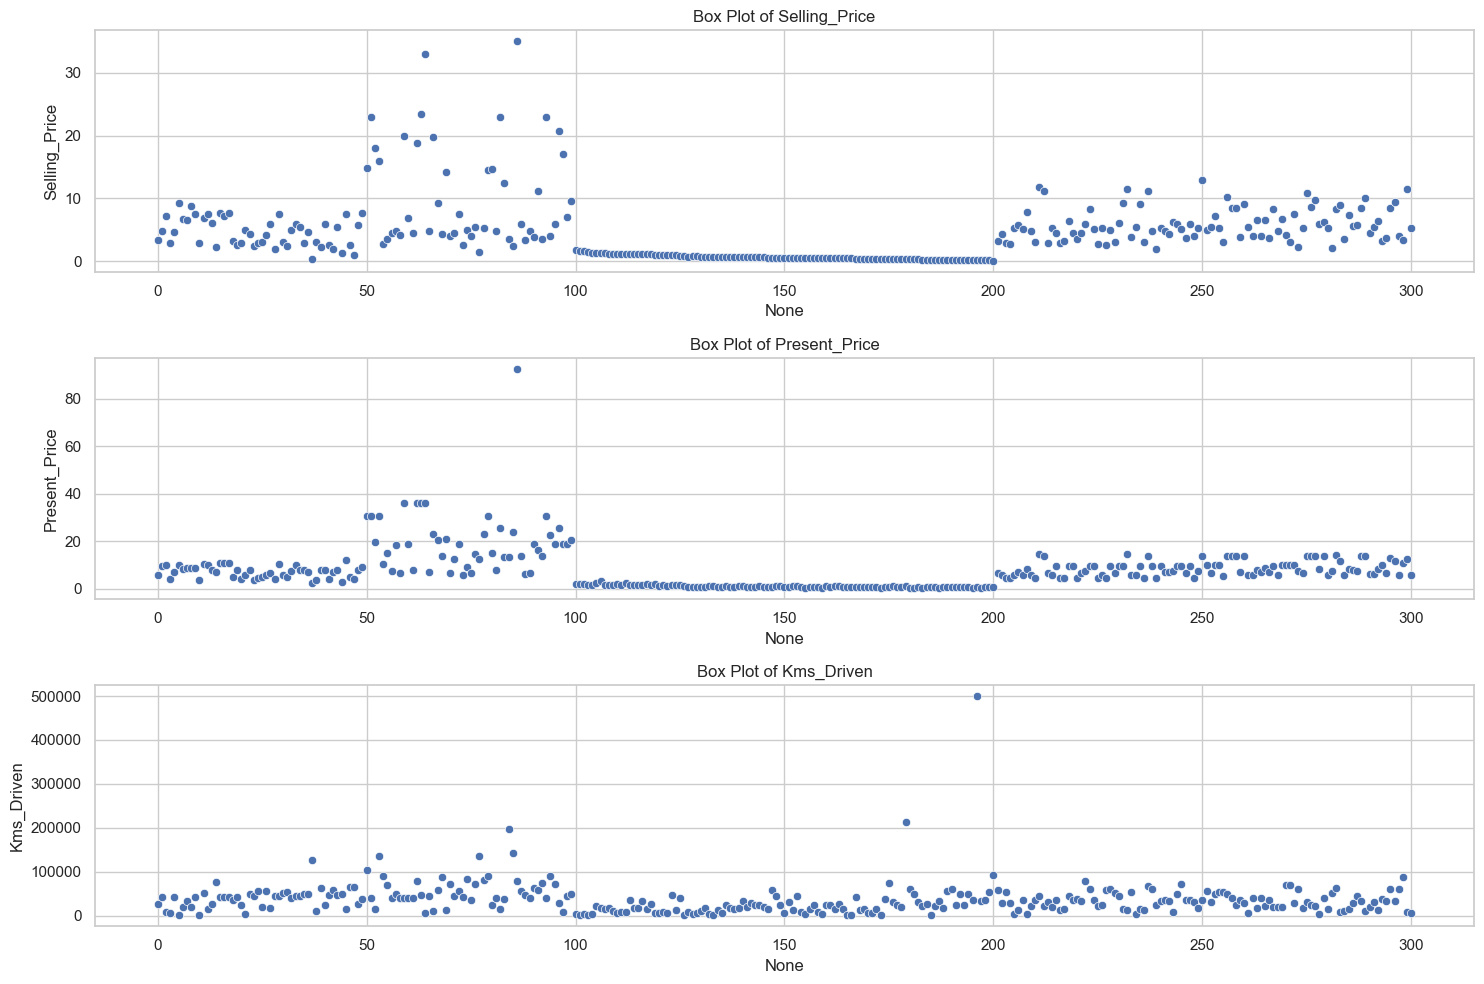

In [41]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(out_liers.columns, 1):
    plt.subplot(len(out_liers.columns), 1, i)
    sns.scatterplot(x=out_liers.index, y=out_liers[column])
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()

In [42]:
Q1 = df.Selling_Price.quantile(0.25)
Q3 = df.Selling_Price.quantile(0.75)
IQR = Q3 - Q1
lower_limt = Q1 - 1.5*IQR
upper_limt = Q3 + 1.5*IQR
df[(df.Selling_Price < lower_limt ) | (df.Selling_Price > upper_limt )].head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,fortuner,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
52,innova,2017,18.00,19.77,15000,Diesel,Dealer,Automatic,0
53,fortuner,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,fortuner,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0


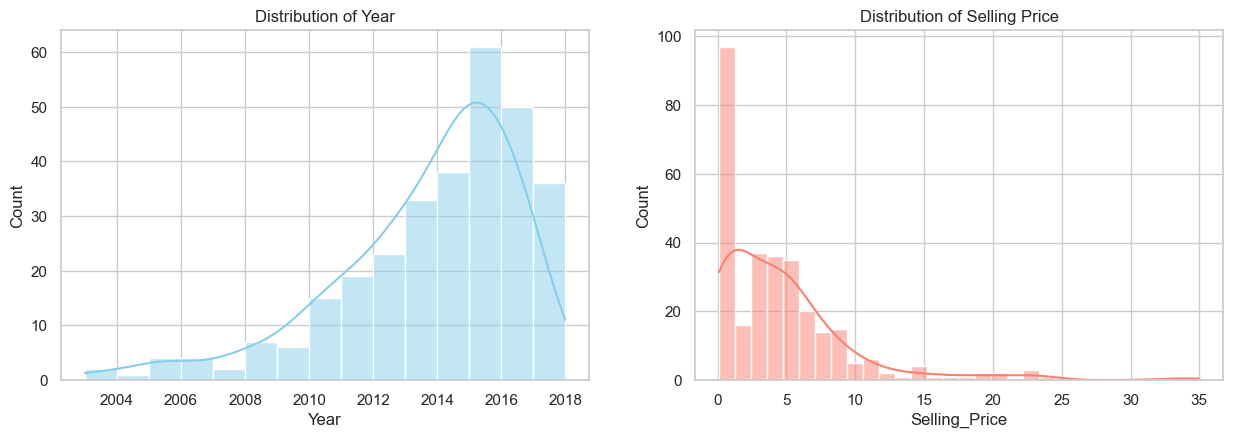

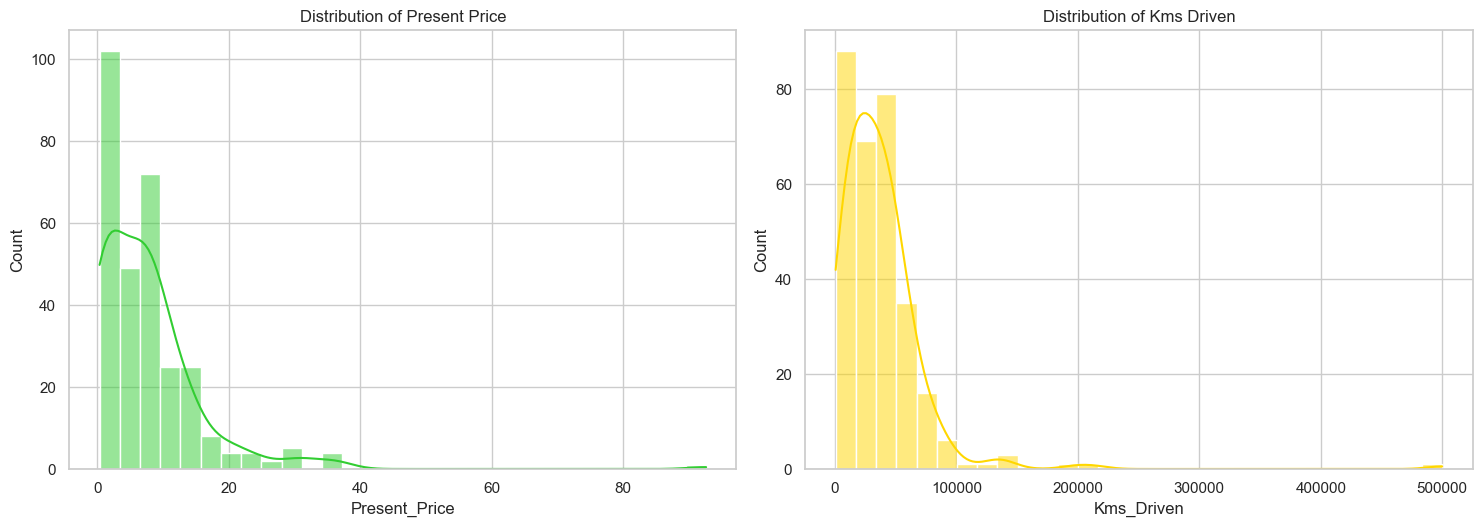

In [43]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['Year'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Year')

plt.subplot(2, 2, 2)
sns.histplot(df['Selling_Price'], kde=True, bins=30, color='salmon')
plt.title('Distribution of Selling Price')

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.histplot(df['Present_Price'], kde=True, bins=30, color='limegreen')
plt.title('Distribution of Present Price')

plt.subplot(2, 2, 4)
sns.histplot(df['Kms_Driven'], kde=True, bins=30, color='gold')
plt.title('Distribution of Kms Driven')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Selling Price vs Fuel Type')

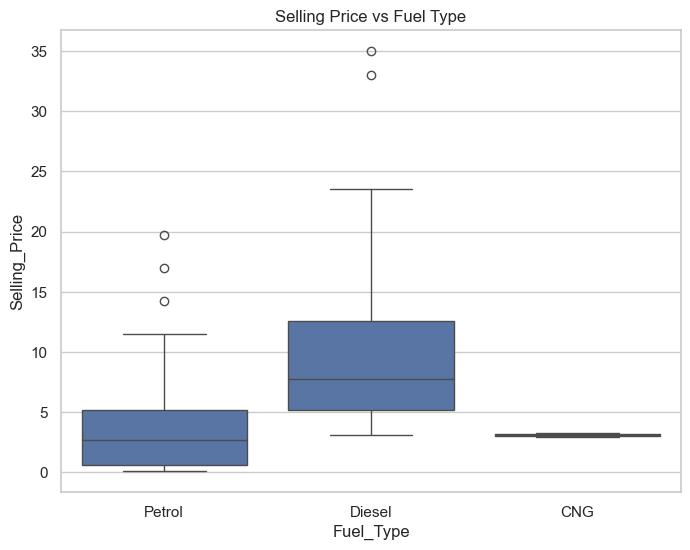

In [44]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Selling Price vs Fuel Type')

Text(0.5, 1.0, 'Selling Price vs Transmission')

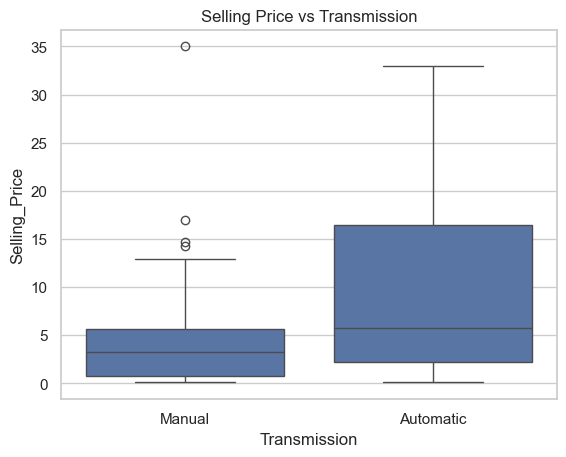

In [45]:
sns.set(style="whitegrid")
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title('Selling Price vs Transmission')

Text(0.5, 1.0, 'Selling Price vs Seller_Type')

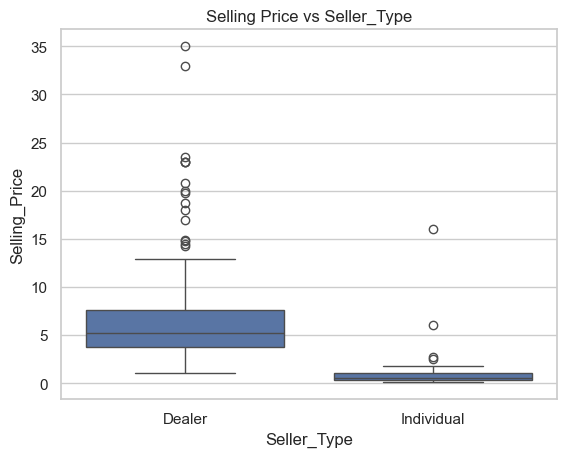

In [46]:
sns.set(style="whitegrid")
sns.boxplot(x='Seller_Type', y='Selling_Price', data=df)
plt.title('Selling Price vs Seller_Type')

Text(0.5, 1.0, 'Selling Price vs Owner')

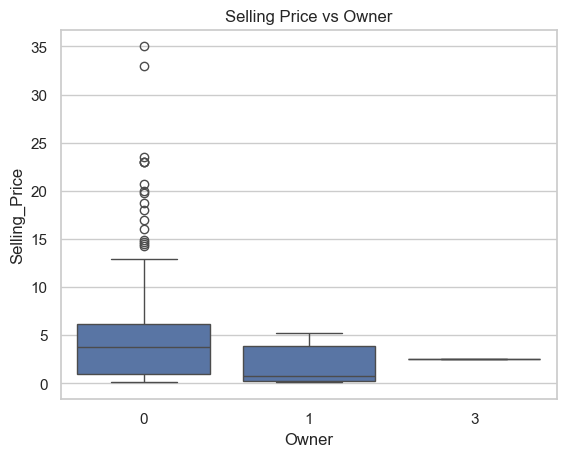

In [47]:
sns.set(style="whitegrid")
sns.boxplot(x='Owner', y='Selling_Price', data=df)
plt.title('Selling Price vs Owner')

C:\Users\Badawy\AppData\Local\Temp\ipykernel_13952\891940937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Transmission', data=df, palette='Set2')


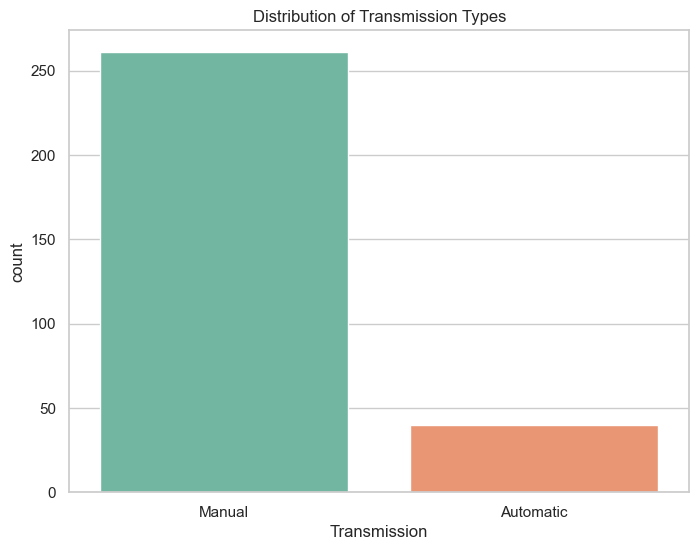

In [48]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Transmission', data=df, palette='Set2')
plt.title('Distribution of Transmission Types')
plt.show()

C:\Users\Badawy\AppData\Local\Temp\ipykernel_13952\177518796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Owner', data=df, palette='Set2')


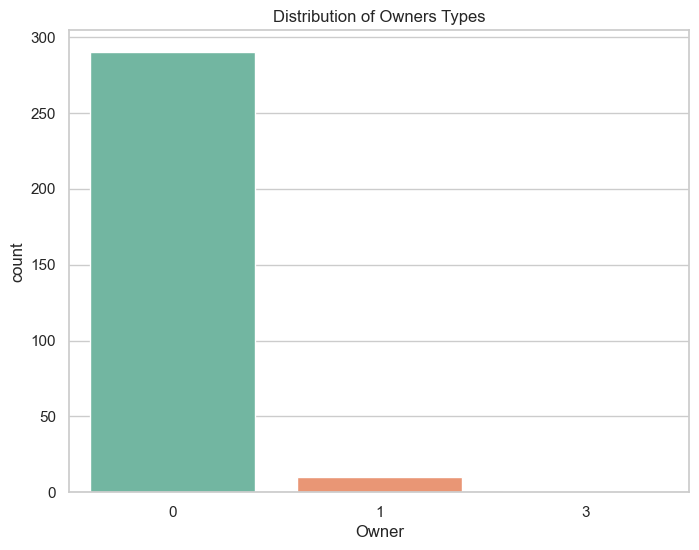

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Owner', data=df, palette='Set2')
plt.title('Distribution of Owners Types')
plt.show()

C:\Users\Badawy\AppData\Local\Temp\ipykernel_13952\2277400879.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Seller_Type', data=df, palette='Set2')


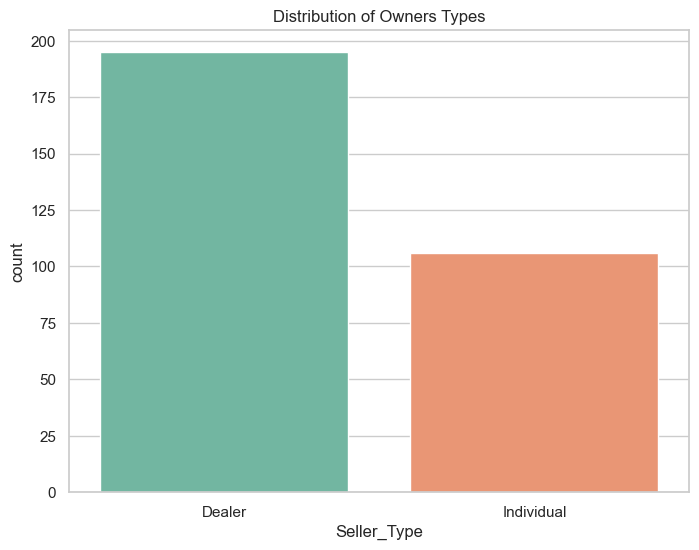

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Seller_Type', data=df, palette='Set2')
plt.title('Distribution of Owners Types')
plt.show()

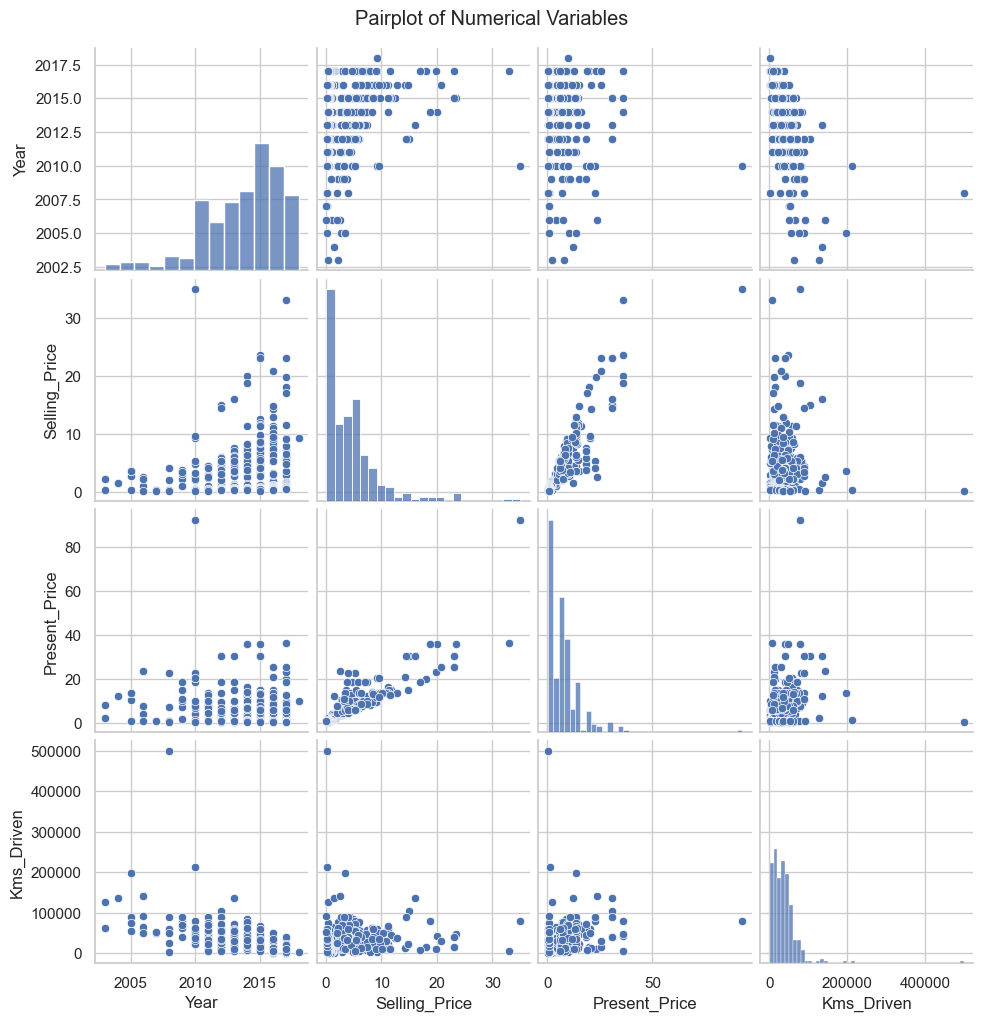

In [51]:
numeric_data = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']]
sns.pairplot(numeric_data)
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()

# Feature engineering 

In [52]:
df.drop(columns=['Owner'])
current_year = datetime.datetime.now().year
df['Car_Age'] = current_year - df['Year']
df['Depreciation'] = df['Present_Price'] - df['Selling_Price']
df['Price_Ratio'] = df['Selling_Price'] / df['Present_Price']
df['Price_Ratio'] = df['Price_Ratio'].replace([float('inf'), -float('inf')], 0)
df['Kms_Driven_Log'] = np.log1p(df['Kms_Driven'])

In [53]:
car_name_mapping = {label: idx for idx, label in enumerate(df['Car_Name'].unique())}
fuel_type_mapping = {label: idx for idx, label in enumerate(df['Fuel_Type'].unique())}
seller_type_mapping = {label: idx for idx, label in enumerate(df['Seller_Type'].unique())}
transmission_mapping = {label: idx for idx, label in enumerate(df['Transmission'].unique())}

In [54]:
df['Car_Name'] = df['Car_Name'].map(car_name_mapping)
df['Fuel_Type'] = df['Fuel_Type'].map(fuel_type_mapping)
df['Seller_Type'] = df['Seller_Type'].map(seller_type_mapping)
df['Transmission'] = df['Transmission'].map(transmission_mapping)

# Model Build and  Evaluating

In [55]:
X = df[['Car_Name', 'Car_Age', 'Kms_Driven_Log', 'Transmission', 'Fuel_Type']]
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.7067819672131147
Mean Squared Error: 1.1600184863934428
R-squared: 0.9496423246663581


# prediction function for new car data 

In [56]:
def predict_new_car(car_name, year, kms_driven, transmission , fuel_type ):
    car_age = current_year - year
    kms_driven_log = np.log1p(kms_driven)

    car_name_encoded = car_name_mapping.get(car_name, -1)
    transmission_encoded = transmission_mapping.get(transmission, -1)
    fuel_type_encoded = fuel_type_mapping.get(fuel_type, -1)

    if car_name_encoded == -1 or transmission_encoded == -1 or fuel_type_encoded == -1:
        raise ValueError("Unseen label found in input data. Please make sure all labels are known.")


    car_df = pd.DataFrame([[car_name_encoded, car_age, kms_driven_log, transmission_encoded , fuel_type_encoded]],
                          columns=['Car_Name', 'Car_Age', 'Kms_Driven_Log', 'Transmission', 'Fuel_Type'])

    prediction = model.predict(car_df)
    return prediction[0]

In [65]:
predicted_price = predict_new_car(
        car_name='ciaz',
        year=2017,
        kms_driven=6900,
        transmission='Manual',
        fuel_type='Petrol'
)
predicted_price

np.float64(6.912000000000002)

In [59]:
importances = model.feature_importances_
feature_names = ['Car_Name', 'Car_Age', 'Kms_Driven_Log', 'Transmission', 'Fuel_Type']

car_example = {
    'Car_Name': car_name_mapping['ciaz'],
    'Car_Age': 2024 - 2017,
    'Kms_Driven_Log': np.log1p(6900),
    'Transmission': transmission_mapping['Manual'],
    'Fuel_Type': fuel_type_mapping['Petrol']
}


In [60]:
contributions = []
for feature, importance in zip(feature_names, importances):
    contribution = importance * car_example[feature]
    contributions.append(contribution)

contributions = np.array(contributions)
total_contribution = contributions.sum()
contributions = contributions / total_contribution * predicted_price


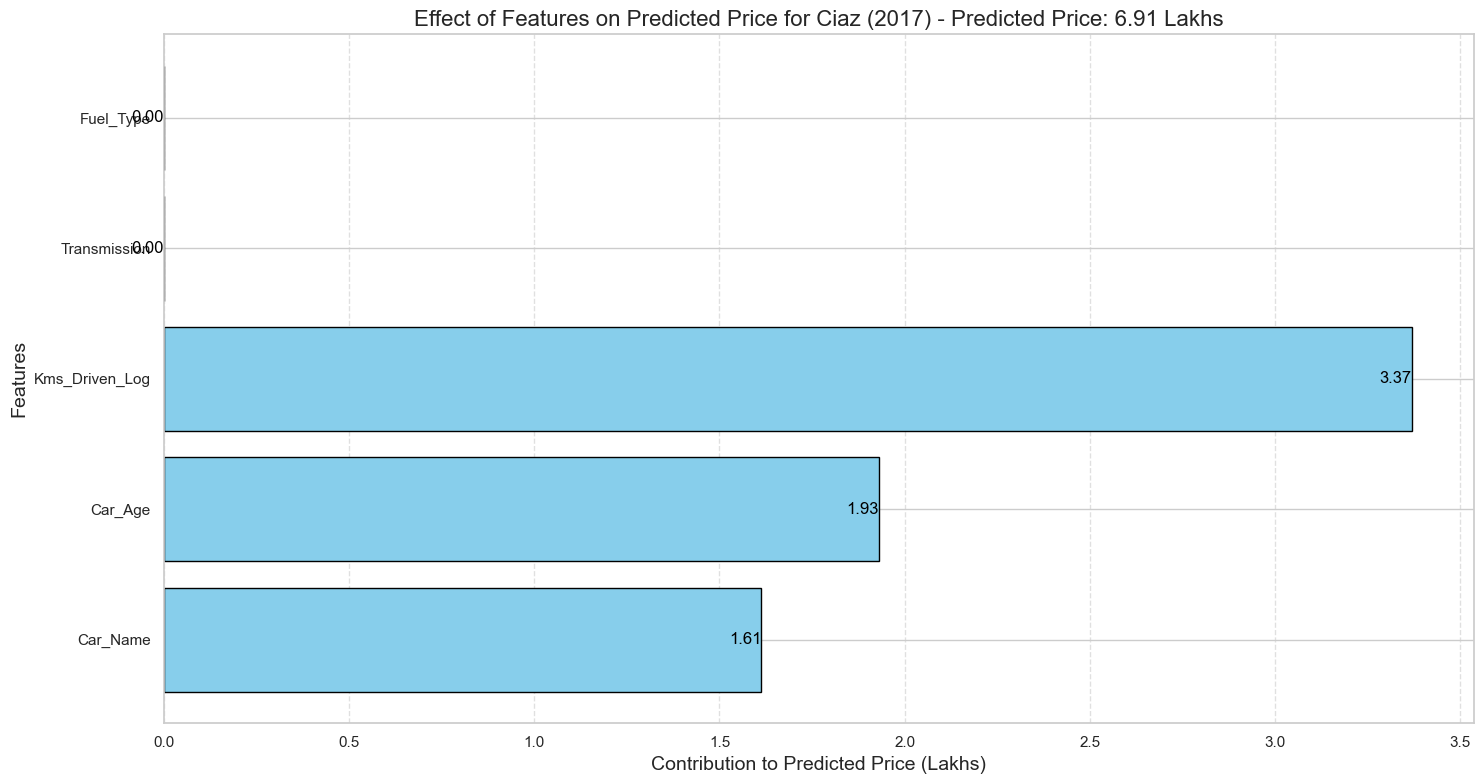

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
bars = plt.barh(feature_names, contributions, color='skyblue', edgecolor='black')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='right', fontsize=12, color='black')

plt.title(f'Effect of Features on Predicted Price for Ciaz (2017) - Predicted Price: {predicted_price:.2f} Lakhs', fontsize=16)
plt.xlabel('Contribution to Predicted Price (Lakhs)', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


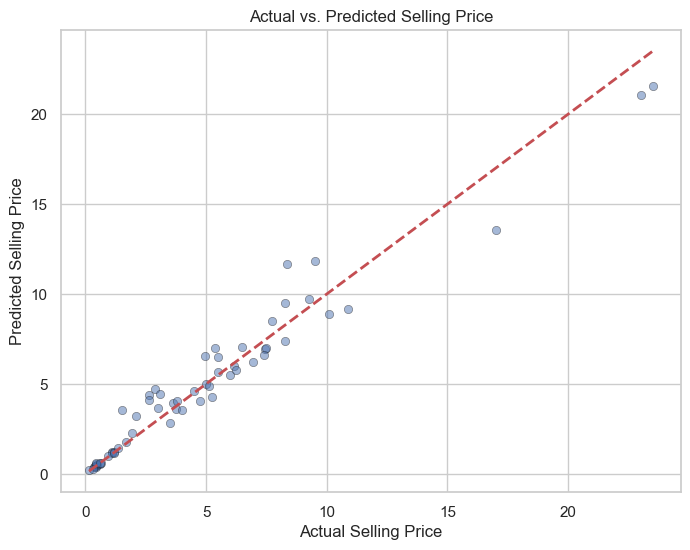

In [58]:
def plot_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5, edgecolor='k')
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Selling Price')
    plt.ylabel('Predicted Selling Price')
    plt.title('Actual vs. Predicted Selling Price')
    plt.show()

plot_predictions(y_test, y_pred)